## SIR Model

In [249]:
SIR.onestep <- function (x, params) {
  susceptible <- x[2] # susceptible
  infected <- x[3]  # Infected
  recovered <- x[4]  # Recovered
  N <- susceptible+infected+recovered  # Total number of people in population
  mu <- params["mu"] # recovery rate
  beta <- params["beta"] # trnasmission rate 
  ## each individual rate
  rates <- c(
             #birth=mu*N,
             infection=beta*susceptible*infected/N,
             recovery=mu*infected
             #sdeath=mu*X,
             #ideath=mu*Y,
             #rdeath=mu*Z
             )
  ## what changes with each event?
  transitions <- list( 
                      #birth=c(1,0,0),
                      infection=c(-1,1,0),
                      recovery=c(0,-1,1)
                      #sdeath=c(-1,0,0),
                      #ideath=c(0,-1,0),
                      #rdeath=c(0,0,-1)
                      )
  ## total event rate
  total.rate <- sum(rates)
  ## waiting time
  if (total.rate==0) 
    tau <- Inf
  else
    tau <- rexp(n=1,rate=total.rate)
  ## which event occurs?
  event <- sample.int(n=2,size=1,prob=rates/total.rate)
  x+c(tau,transitions[[event]])
}

In [250]:
SIR.simul <- function (x, params, maxstep = 10000) {
  output <- array(dim=c(maxstep+1,4))
  colnames(output) <- names(x)
  output[1,] <- x
  k <- 1
  ## loop until either k > maxstep or
  ## there are no more infectives
  while ((k <= maxstep) && (x["infected"] > 0)) {
    k <- k+1
    output[k,] <- x <- SIR.onestep(x,params)
  }
  as.data.frame(output[1:k,])
}

### SImulation 1: mu greater than  beta

.n,time,susceptible,infected,recovered
1,0.00000000,80,20,0
1,0.02552997,80,19,1
1,0.07269172,80,18,2
1,0.09657927,79,19,2
1,0.10972215,79,18,3
1,0.11761272,79,17,4


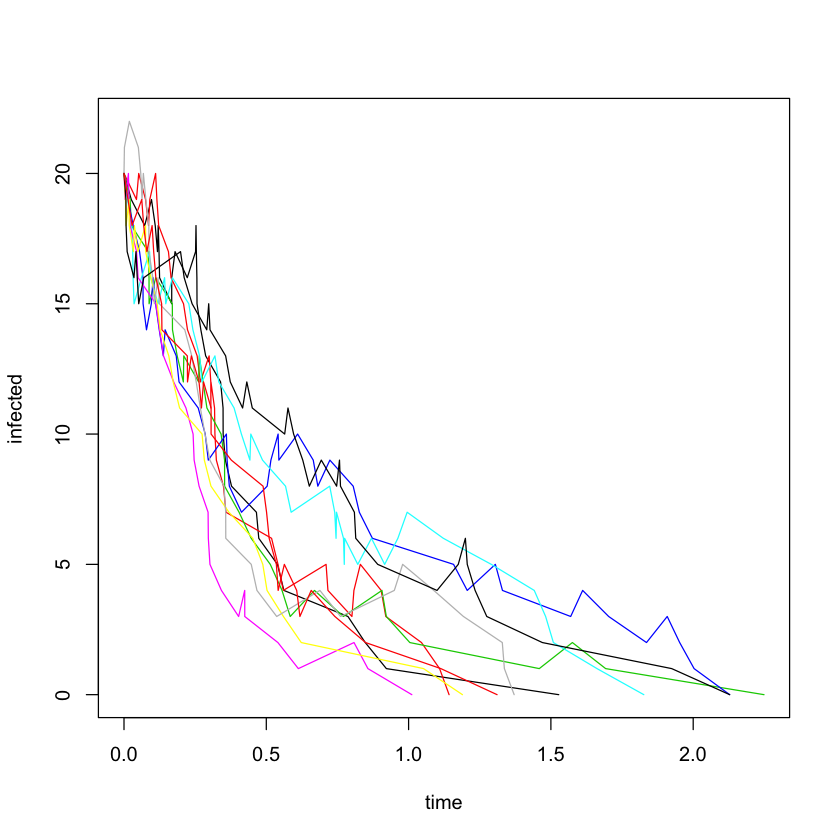

In [251]:
set.seed(56856583)
nsims <- 10
xstart <- c(time=0,susceptible=80,infected=20,recovered=0) #initial conditions
params <- c(mu=3,beta=1 ) #model parameters

require(plyr)
simdat <- rdply(
                nsims,
                SIR.simul(xstart,params)
                )
head(simdat)
plot(infected~time,data=simdat,type='n')

d_ply(simdat,".n",function(x)lines(infected~time,data=x,col=.n))

.n,time,susceptible,infected,recovered
1,0.00000000,80,20,0
1,0.02552997,80,19,1
1,0.07269172,80,18,2
1,0.09657927,79,19,2
1,0.10972215,79,18,3
1,0.11761272,79,17,4


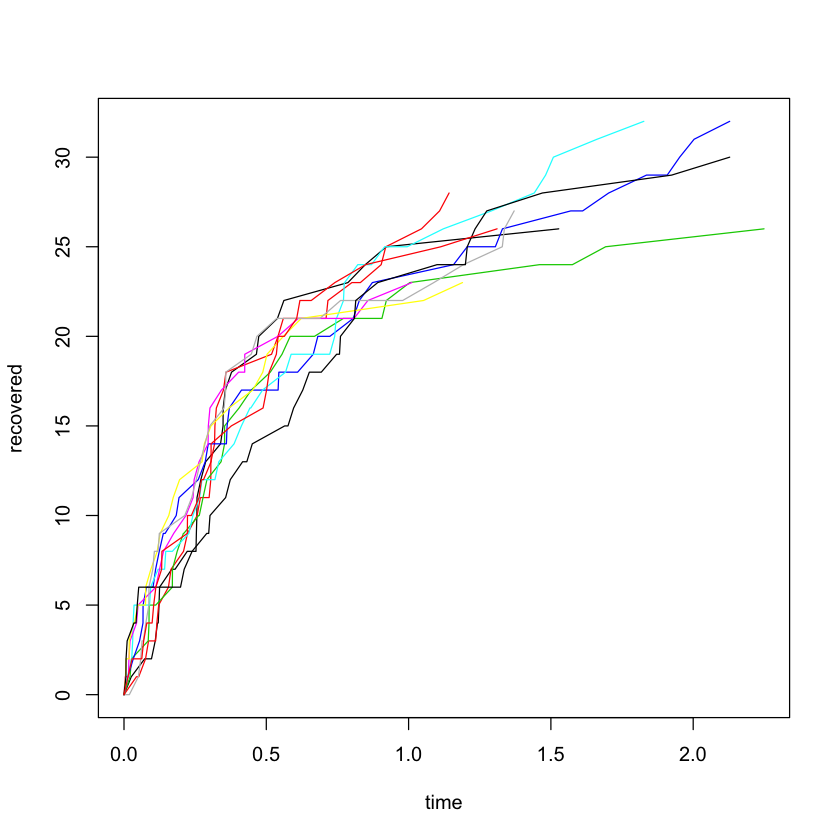

In [252]:
head(simdat)
plot(recovered~time,data=simdat,type='n')

d_ply(simdat,".n",function(x)lines(recovered~time,data=x,col=.n))

.n,time,susceptible,infected,recovered
1,0.00000000,80,20,0
1,0.02552997,80,19,1
1,0.07269172,80,18,2
1,0.09657927,79,19,2
1,0.10972215,79,18,3
1,0.11761272,79,17,4


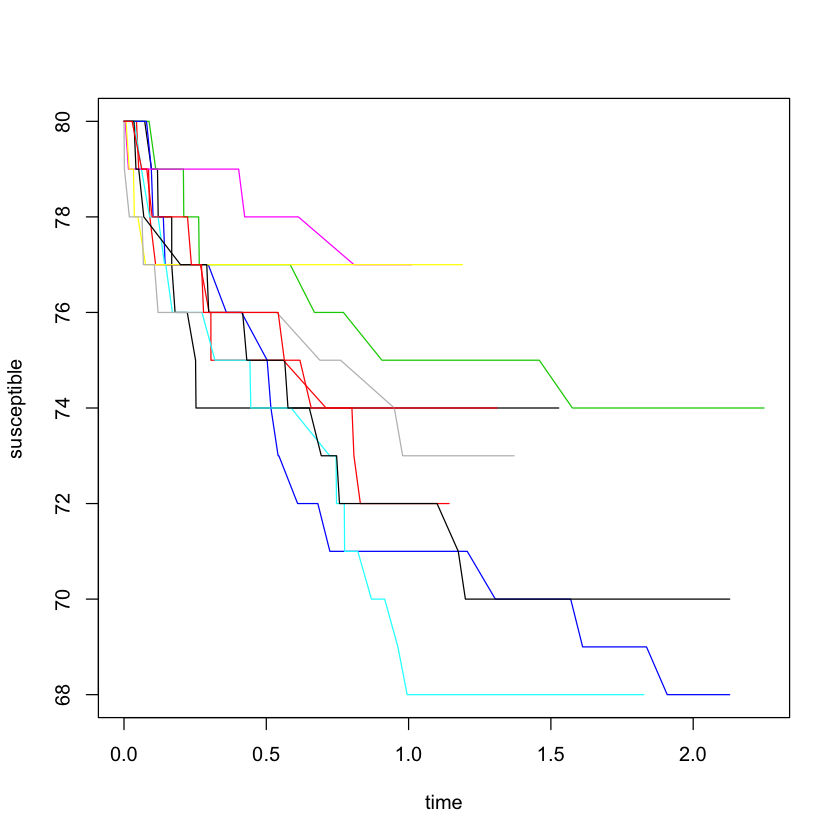

In [253]:
head(simdat)
plot(susceptible~time,data=simdat,type='n')

d_ply(simdat,".n",function(x)lines(susceptible~time,data=x,col=.n))

# SIR for beta greater than mu

.n,time,susceptible,infected,recovered
1,4.000000,400,70,0
1,4.002362,399,71,0
1,4.006456,398,72,0
1,4.008396,398,71,1
1,4.009535,397,72,1
1,4.010175,397,71,2


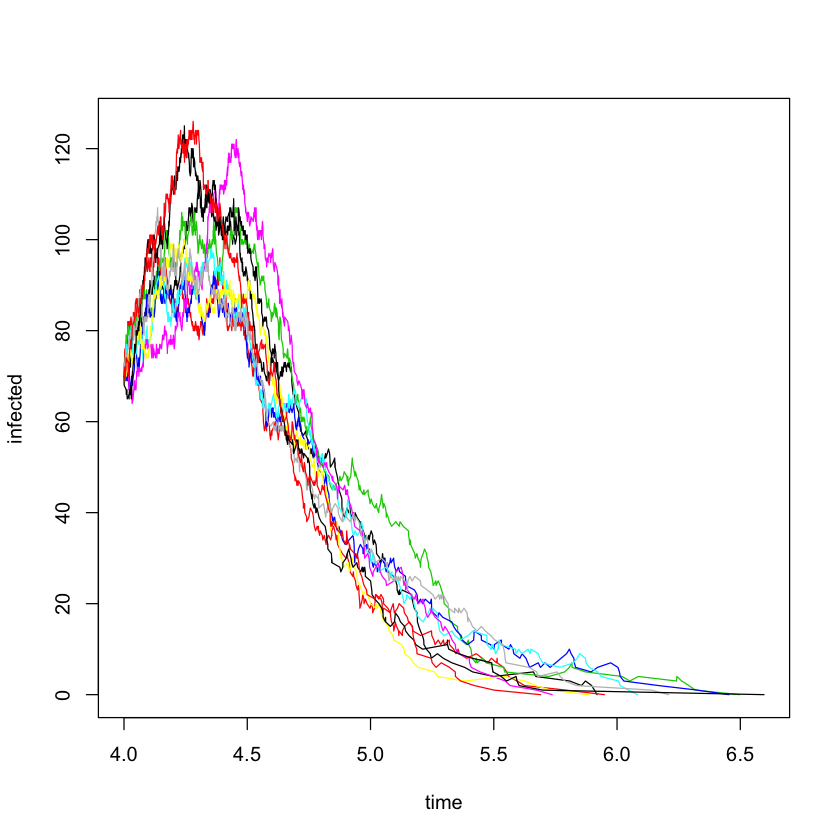

In [255]:
set.seed(56856583)
nsims <- 10
xstart <- c(time=4,susceptible=400,infected=70,recovered=0) #initial conditions
params <- c(mu=4.5,beta=8.5 ) #model parameters

require(plyr)
simdat <- rdply(
                nsims,
                SIR.simul(xstart,params)
                )
head(simdat)
plot(infected~time,data=simdat,type='n')

d_ply(simdat,".n",function(x)lines(infected~time,data=x,col=.n))

.n,time,susceptible,infected,recovered
1,4.000000,400,70,0
1,4.002362,399,71,0
1,4.006456,398,72,0
1,4.008396,398,71,1
1,4.009535,397,72,1
1,4.010175,397,71,2


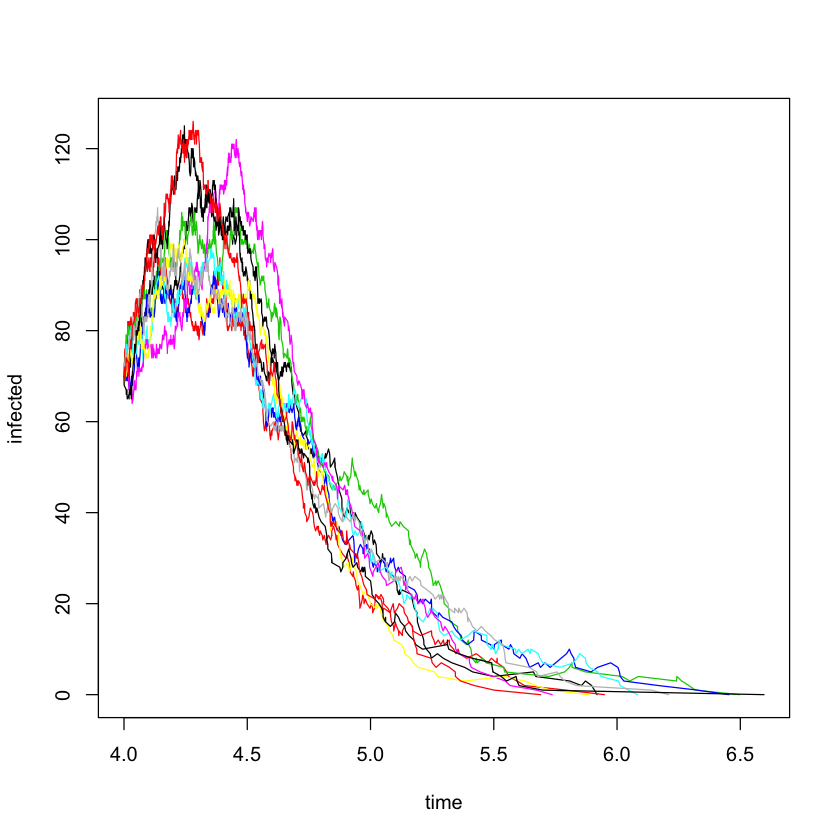

In [256]:
head(simdat)
plot(infected~time,data=simdat,type='n')

d_ply(simdat,".n",function(x)lines(infected~time,data=x,col=.n))

## SIR MODEL

In [257]:
SIR.onestep <- function (x, params) {
  susceptible <- x[2] # susceptible
  infected <- x[3]  # Infected
  N <- susceptible+infected# Total number of people in population
  mu <- params["mu"] # recovery rate
  beta <- params["beta"] # trnasmission rate 
  ## each individual rate
  rates <- c(
             
             infection=mu*susceptible*infected/N,
             recovery=beta*infected
             
             )
  ## what changes with each event?
  transitions <- list( 
                      
                      infection=c(-1,1),
                      recovery=c(1,-1)
                      
                      )
  ## total event rate
  total.rate <- sum(rates)
  ## waiting time
  if (total.rate==0) 
    tau <- Inf
  else
    tau <- rexp(n=1,rate=total.rate)
  ## which event occurs?
  event <- sample.int(n=2,size=1,prob=rates/total.rate)
  x+c(tau,transitions[[event]])
}

In [258]:
SIR.simul <- function (x, params, maxstep = 10000) {
  output <- array(dim=c(maxstep+1,3))
  colnames(output) <- names(x)
  output[1,] <- x
  k <- 1
  ## loop until either k > maxstep or
  ## there are no more infectives
  while ((k <= maxstep) && (x["infected"] > 0)) {
    k <- k+1
    output[k,] <- x <- SIR.onestep(x,params)
  }
  as.data.frame(output[1:k,])
}

.n,time,susceptible,infected
1,0.000000000,400,70
1,0.002248072,401,69
1,0.006247385,402,68
1,0.008193145,401,69
1,0.009304727,402,68
1,0.009945761,401,69


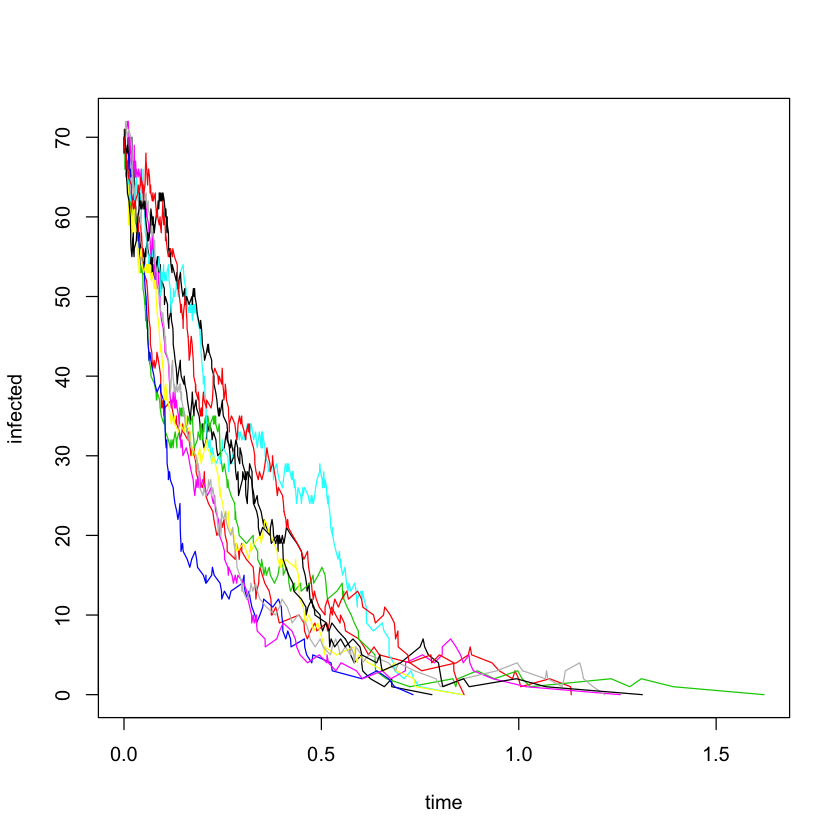

In [259]:
set.seed(56856583)
nsims <- 10
xstart <- c(time=0,susceptible=400,infected=70) #initial conditions
params <- c(mu=4.5,beta=8.5 ) #model parameters

require(plyr)
simdat <- rdply(
                nsims,
                SIR.simul(xstart,params)
                )
head(simdat)
plot(infected~time,data=simdat,type='n')

d_ply(simdat,".n",function(x)lines(infected~time,data=x,col=.n))

.n,time,susceptible,infected
1,0.000000000,400,70
1,0.002248072,401,69
1,0.006247385,402,68
1,0.008193145,401,69
1,0.009304727,402,68
1,0.009945761,401,69


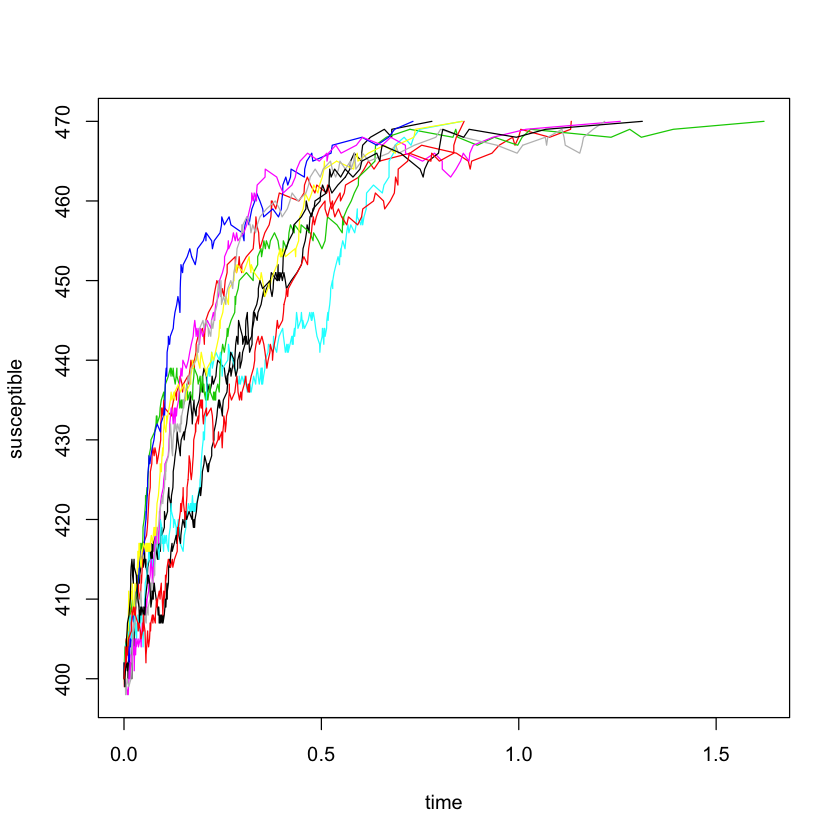

In [260]:
head(simdat)
plot(susceptible~time,data=simdat,type='n')

d_ply(simdat,".n",function(x)lines(susceptible~time,data=x,col=.n))

##  Maximum Likelihood

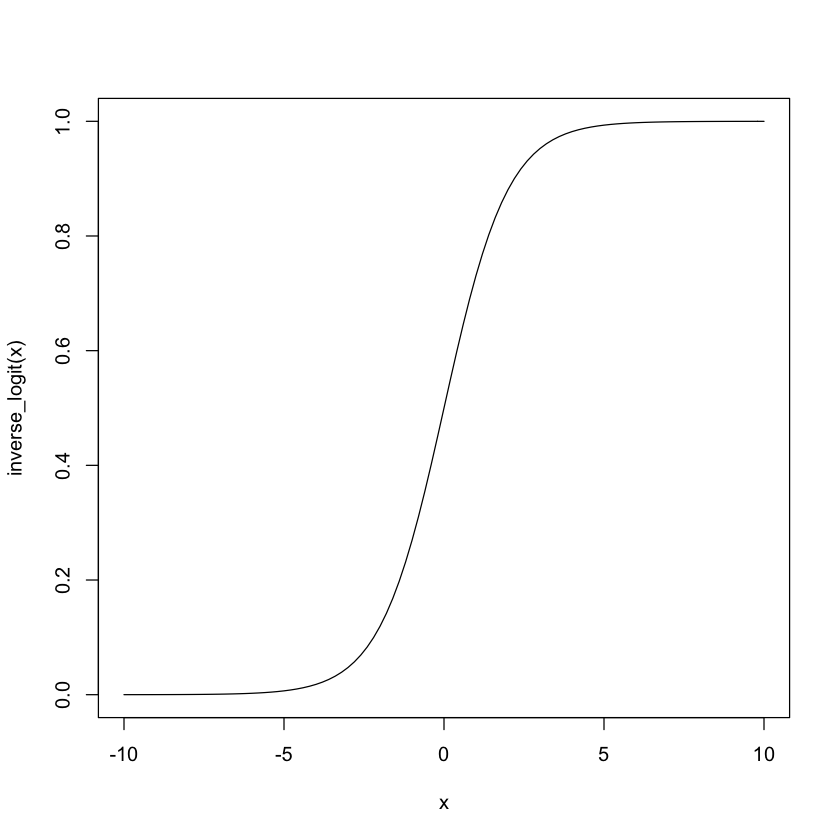

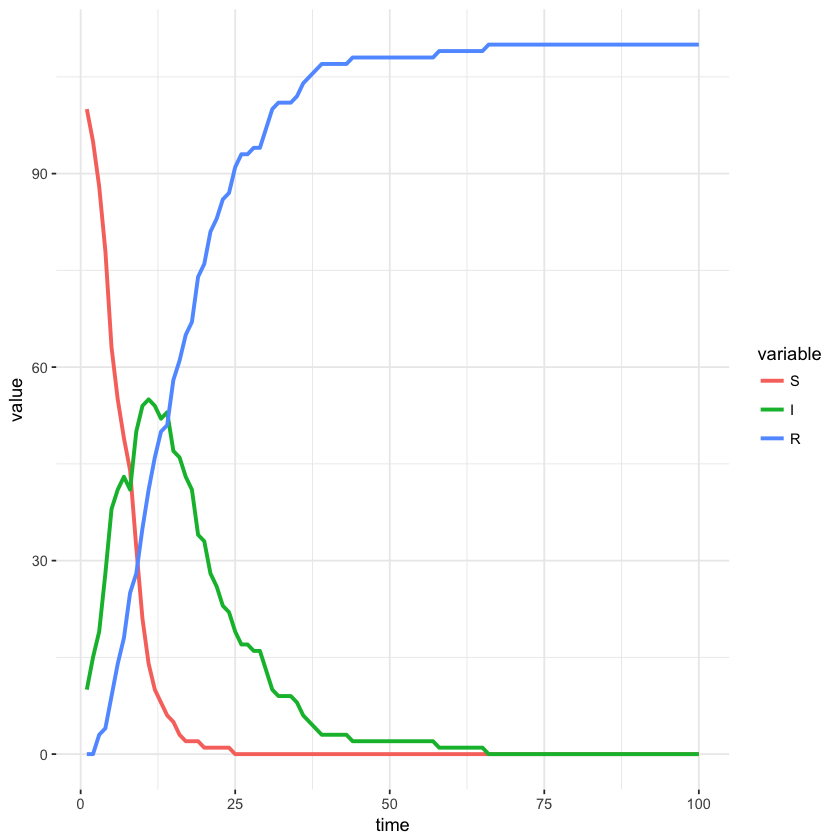

In [289]:
inverse_logit <- function(x) {
    p <- exp(x) / (1 + exp(x))  # Maps R to [0, 1]
    return(p)
}
curve(inverse_logit, -10, 10)  # Sanity check

loglik <- function(logit_beta_gamma=5, df) {
    stopifnot(length(logit_beta_gamma) == 2)
   beta <- inverse_logit(logit_beta_gamma[1])
    gamma <- inverse_logit(logit_beta_gamma[2])
    dS <- -diff(df$S)
        dR <- diff(df$R)
    n <- nrow(df)
    pr_dS <- 1 - (1-beta)^df$I[seq_len(n-1)]  # Careful, problematic if 1 or 0
        return(sum(dbinom(dS, size=df$S[seq_len(n-1)], prob=pr_dS, log=TRUE) +
               dbinom(dR, size=df$I[seq_len(n-1)], prob=gamma, log=TRUE)))
}

get_estimates <- function() {
    df <- simulate()
    mle <- optim(par=c(-4, 0), fn=loglik, control=list(fnscale=-1), df=df)
    beta_gamma_hat <- inverse_logit(mle$par)
    names(beta_gamma_hat) <- c("beta", "gamma")
    return(beta_gamma_hat)
}

set.seed(54321999)

df <- simulate()
df_melted <- melt(df, id.vars="t")
p <- (ggplot(df_melted, aes(x=t, y=value, color=variable)) +
      geom_line(size=1.1) + theme_bw() +
      xlab("time") +
      theme(legend.key=element_blank()) +
      theme(panel.border=element_blank()))
p

## Sampling distribution of beta_gamma_hat
estimates <- replicate(100, get_estimates())
df_estimates <- as.data.frame(t(estimates))

beta,0.005839188,0.005188083,0.005976678,0.005533678,0.00518408,0.004998566,0.005191324,0.005220187,0.004910736,0.005224812,⋯,0.004953542,0.004592044,0.004168102,0.004848796,0.004643727,0.005158873,0.00553978,0.004534585,0.004665584,0.004425469
gamma,0.096741535,0.097762818,0.107247465,0.109783198,0.11496657,0.104277239,0.091566328,0.097010338,0.105042074,0.105415106,⋯,0.104662806,0.089712374,0.089108610,0.097184227,0.108698001,0.099980832,0.09345230,0.110474771,0.118368552,0.098994102
